## Dropout Regularization
- When you have training data, if you try to train your model too much, it might overfit, and when you get the actual test data for making predictions, it will not probably perform well. Dropout regularization is one technique used to tackle overfitting problems in deep learning.


In the below image, we are applying a dropout on the second hidden layer of a neuron network.

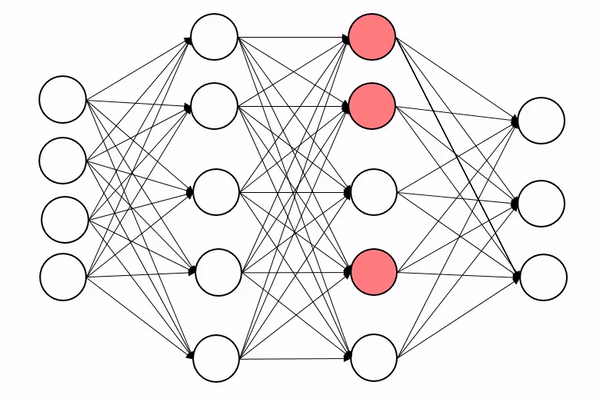

### Why will dropout help with overfitting?
- It can’t rely on one input as it might be randomly dropped out.
- Neurons will not learn redundant details of inputs

### Now, let's implement it into the code

#### We will be working on "sonar_chirp.csv" dataset
- This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders.



In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Since the ds doesen't have column name, I will initialize header = None, it returns number as column

df = pd.read_csv('sonar_dataset.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
# shape of the dataset
df.shape

(208, 61)

207 rows, 61 columns

In [4]:
# Check null values

df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

No null values means we can move further

In [5]:
# columns
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

Last column is our target column

In [6]:
df[60].value_counts() # label is not skewed

60
M    111
R     97
Name: count, dtype: int64

In [7]:
# Split the ds for training and testing

x = df.drop(60, axis=1)
y = df[60]

In [8]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [9]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

ML model doesn't understand letter. so, let's do one-hod-encoding to 'y'

In [10]:
y = pd.get_dummies(y, drop_first=True)
y.sample(5) # R --> 1 and M --> 0

,R
71,True
15,True
84,True
197,False
44,True


In [11]:
y.value_counts()

R    
False    111
True      97
Name: count, dtype: int64

In [12]:
# Libraries

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [13]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
86,0.0188,0.0370,0.0953,0.0824,0.0249,0.0488,0.1424,0.1972,0.1873,0.1806,...,0.0143,0.0093,0.0033,0.0113,0.0030,0.0057,0.0090,0.0057,0.0068,0.0024
89,0.0235,0.0291,0.0749,0.0519,0.0227,0.0834,0.0677,0.2002,0.2876,0.3674,...,0.0242,0.0083,0.0037,0.0095,0.0105,0.0030,0.0132,0.0068,0.0108,0.0090
194,0.0392,0.0108,0.0267,0.0257,0.0410,0.0491,0.1053,0.1690,0.2105,0.2471,...,0.0089,0.0083,0.0080,0.0026,0.0079,0.0042,0.0071,0.0044,0.0022,0.0014
100,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0257,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131
155,0.0211,0.0128,0.0015,0.0450,0.0711,0.1563,0.1518,0.1206,0.1666,0.1345,...,0.0174,0.0117,0.0023,0.0047,0.0049,0.0031,0.0024,0.0039,0.0051,0.0015


## Using Deep Learning Model


### Model without Dropout Layer


In [14]:
import tensorflow as tf
from tensorflow import keras

2024-06-07 20:36:12.427206: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 20:36:12.434072: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 20:36:12.523229: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 20:36:14.268393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100


/home/jagannath/100OfCode/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5832 - loss: 0.6917
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4645 - loss: 0.6880 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6246 - loss: 0.6657 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7349 - loss: 0.6324 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.5945 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8394 - loss: 0.5390 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7766 - loss: 0.5362 
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8895 - loss: 0.4497 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.4414 
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8412 - loss: 0.3982
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8258 - loss: 0.4306
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8

In [16]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9157 - loss: 0.3282  


[0.36351266503334045, 0.9047619104385376]

In [17]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[1.6841589e-04 9.9981648e-01 9.8146611e-01 1.2209687e-01 1.0000000e+00
 9.8608797e-03 5.1386811e-05 3.8373419e-03 9.0986770e-01 1.6981748e-01]
[0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]


In [19]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[1.6841589e-04 9.9981648e-01 9.8146611e-01 1.2209687e-01 1.0000000e+00
 9.8608797e-03 5.1386811e-05 3.8373419e-03 9.0986770e-01 1.6981748e-01]
[0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]


In [20]:
y_test[:10]


,R
133,False
5,True
13,True
46,True
62,True
20,True
136,False
199,False
92,True
153,False


In [21]:
# Recall, precision, accuracy and f1-score

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      1.00      0.93        25
        True       1.00      0.76      0.87        17

    accuracy                           0.90        42
   macro avg       0.93      0.88      0.90        42
weighted avg       0.92      0.90      0.90        42



## Model with Dropout Layer


In [22]:
model1 = keras.Sequential([
    keras.layers.Dense(60, input_dim = 60, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid'),
    keras.layers.Dropout(0.1),
]) 

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=50, batch_size = 10)

Epoch 1/50


/home/jagannath/100OfCode/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4793 - loss: 1.3677
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5157 - loss: 1.1562 
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5647 - loss: 1.2019 
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6277 - loss: 1.4494
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6801 - loss: 1.0461 
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6272 - loss: 1.9087 
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6499 - loss: 1.7195
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6081 - loss: 1.3068 
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6330 - loss: 1.6328 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6511 - loss: 1.5235
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6716 - loss: 1.2732
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7428 - loss: 1

In [23]:
model1.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8472 - loss: 0.3384  


[0.3493248224258423, 0.8333333134651184]

### Training Accuracy is still good but Test Accuracy Improved



In [24]:
y_pred = model1.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[0.01438357 0.5737025  0.86870575 0.31668696 0.99131876 0.17533958
 0.01545315 0.08178692 0.71421176 0.29555047]
[0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]


In [25]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.96      0.87        25
        True       0.92      0.65      0.76        17

    accuracy                           0.83        42
   macro avg       0.86      0.80      0.82        42
weighted avg       0.85      0.83      0.83        42

